In [1]:
import cv2
import numpy as np
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from matplotlib import pyplot as plt
import matplotlib.path as mplPath
import xml.etree.ElementTree as ET
import Util
from skimage import img_as_ubyte

In [2]:
folderPageImages = 'parzivalDataset'; 
folderGroundThruth = 'groundTruth'
ximg_train = []; ximg_test = []; ximg_validation = [];
ximg_train_superpixels = [];
ximg_test_superpixels = [];
ximg_validation_superpixels = [];
ximgresized_train = []; ximgresized_test = []; ximgresized_validation = [];
xgt_train = []; xgt_test = []; xgt_validation = [];
x_train = []; y_train = []
x_test = []; y_test = []
x_va = []; y_va = []
x = []; y = []


#### Leyendo las imágenes de los documentos y sus respectivos archivos XML que contienen los segmentos (ground truth) como coordenadas de polígonos


In [3]:
ximg_train,      xgt_train      = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'train')     
ximg_test,       xgt_test       = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'test')
ximg_validation, xgt_validation = Util.readPageImagesAndGroundTruth(folderPageImages, folderGroundThruth, 'validation')


####  Reduciendo las imágenes a escala

In [4]:
ximgresized_train = Util.resizeImages(ximg_train, 2**-3)
ximgresized_test = Util.resizeImages(ximg_train, 2**-3)
ximgresized_validation = Util.resizeImages(ximg_train, 2**-3)

index 7 to samples

#### Segmentando las imágenes en super píxeles, usando la técnica de SLIC

In [5]:
ximg_train_superpixels = Util.segmentImageInSuperpixels([ximg_train[7]], 3000)

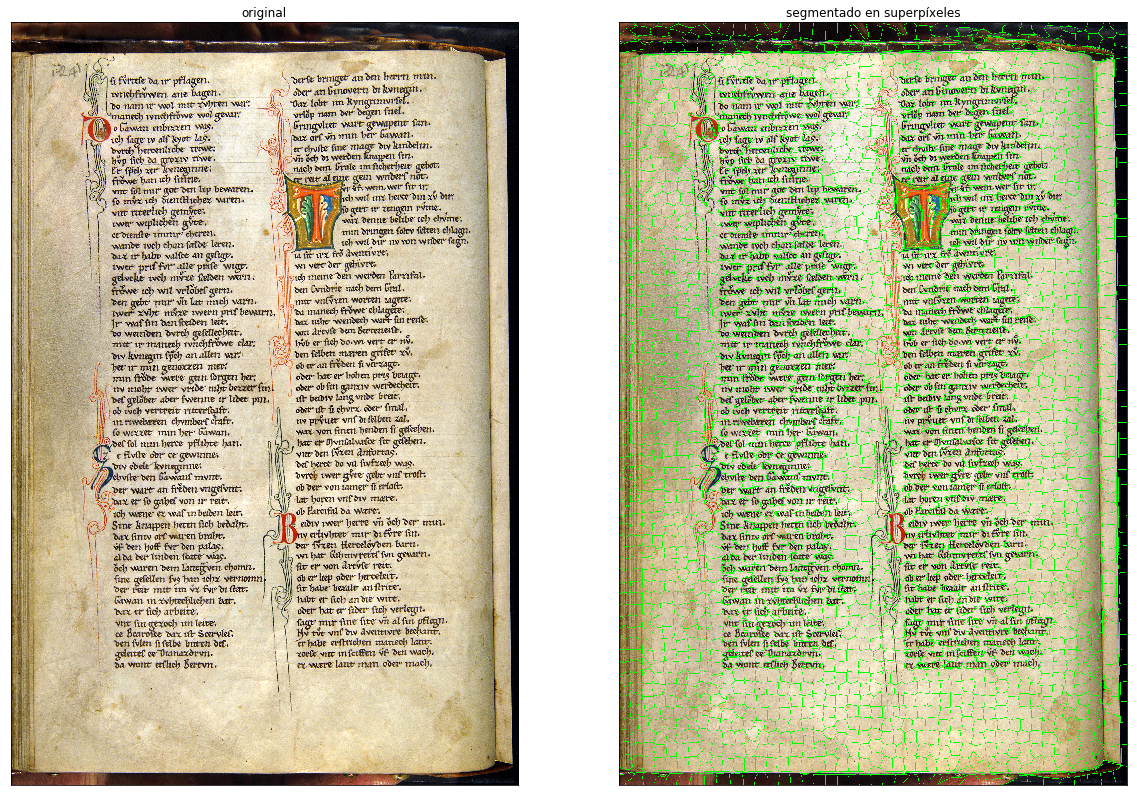

In [6]:
image = ximg_train[7]
imgSegmented = mark_boundaries(image, ximg_train_superpixels[0], color=(0, 1, 0), outline_color=None, mode='outer', background_label=0)
Util.subplot(titles=['original','segmentado en superpíxeles'], images = [image, imgSegmented], rows = 1, imgPerRows = 2, size = 20)

In [7]:
imagePoints = image.copy()
imagePoints = img_as_ubyte(imagePoints)
Util.paintCentralPointsOrPatchesSegments (imagePoints , ximg_train_superpixels[0], 6, 0, False)

C:\WP\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


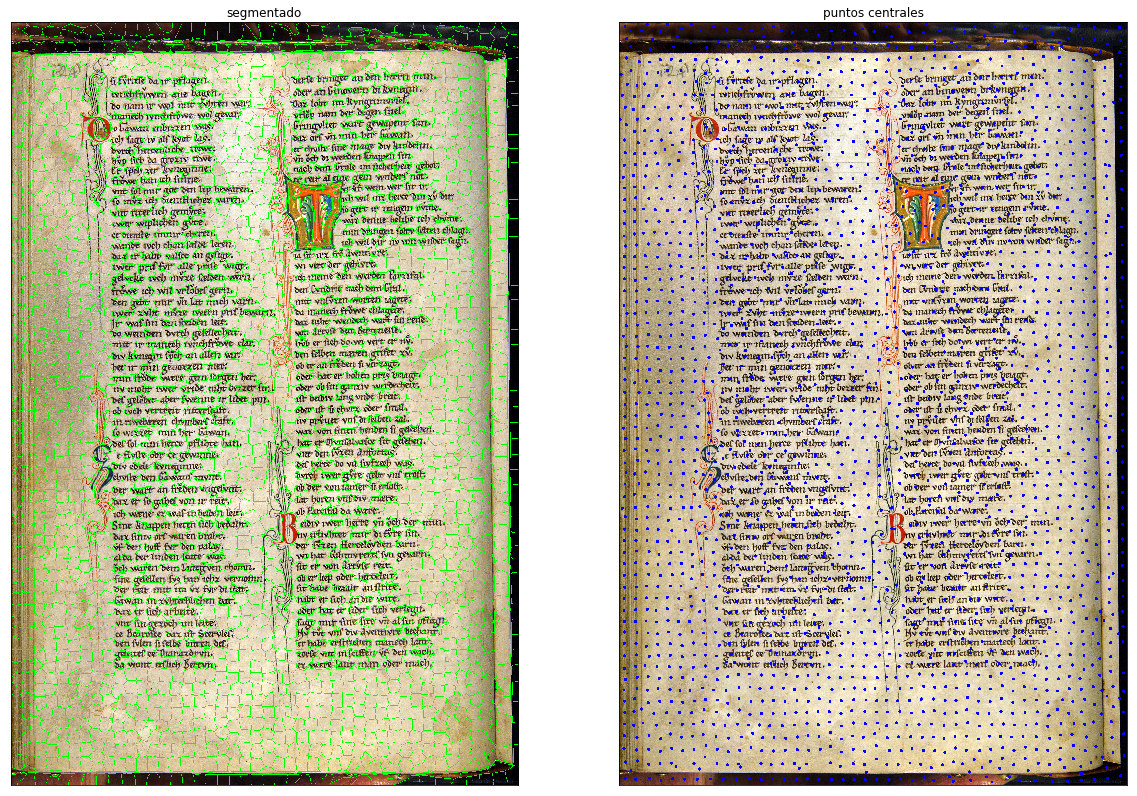

In [8]:
Util.subplot(titles=['segmentado','puntos centrales'], images = [imgSegmented, imagePoints], rows = 1, imgPerRows = 2, size = 20)

In [9]:
# image, segments, radio, sizePatch, isPatch
imagePatches = image.copy()
imagePatches = img_as_ubyte(imagePatches)
Util.paintCentralPointsOrPatchesSegments (imagePatches , ximg_train_superpixels[0], 0, 28, True)

C:\WP\WinPython-64bit-3.5.3.1Qt5\python-3.5.3.amd64\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


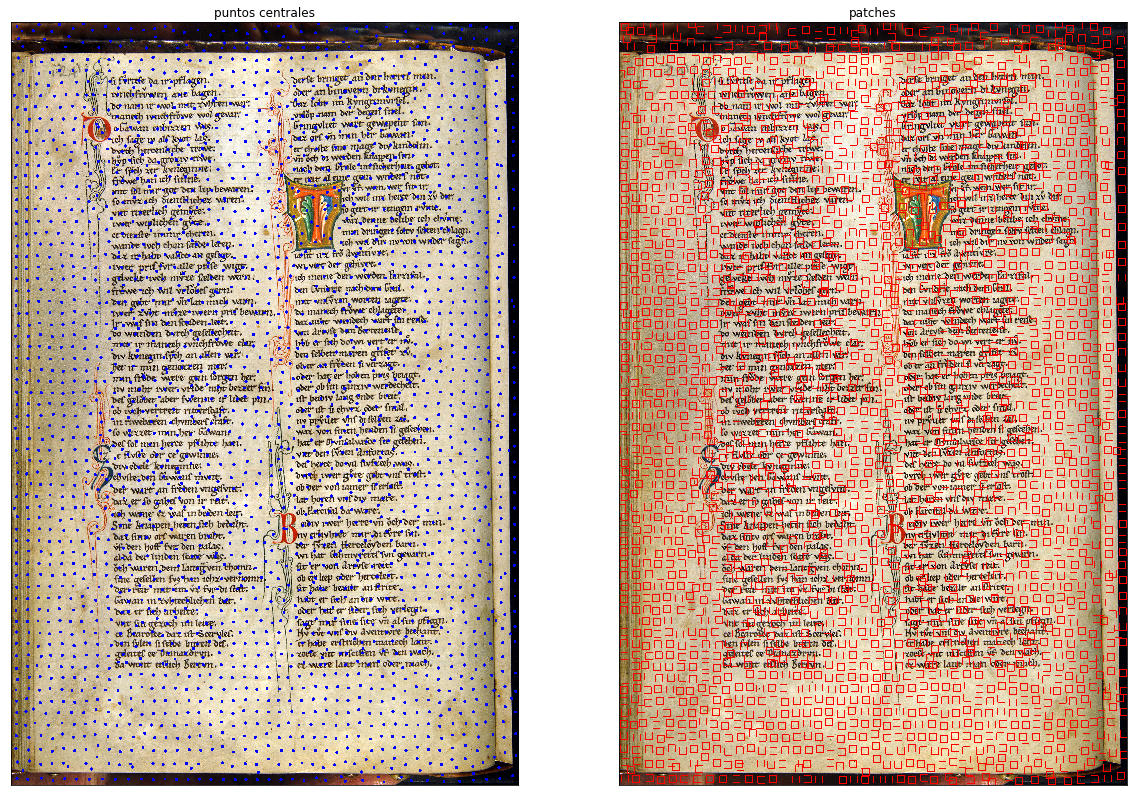

In [10]:
Util.subplot(titles=['puntos centrales','patches'], images = [imagePoints, imagePatches], rows = 1, imgPerRows = 2, size = 20)

### Obteniendo los super píxeles para todas las imágenes de entrenamiento, test y validación

In [11]:
ximg_train_superpixels      = Util.segmentImageInSuperpixels([ximg_train[0]], 3000)
ximg_test_superpixels       = Util.segmentImageInSuperpixels([ximg_test[0]], 3000)
ximg_validation_superpixels = Util.segmentImageInSuperpixels([ximg_validation[0]], 3000)

In [12]:
XTrain, XCentralPoints = Util.doInputs([ximg_train[0]], ximg_train_superpixels, 28)

In [13]:
print(np.shape(XTrain[0][0]))

(28, 28, 3)


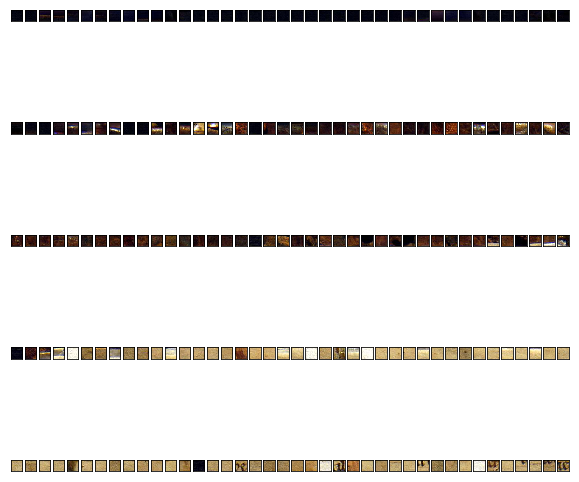

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
for i in range(200):
    plt.subplot(5,40,i+1),plt.imshow(XTrain[0][i],'gray')
    plt.title("")
    plt.xticks([]),plt.yticks([])
plt.show()